In [79]:
import pandas as pd
df = pd.read_csv('/content/company.csv')
df.head()

,company,degree,job,salary_more_than_100k
0,google,bachelors,sales executive,0
1,google,masters,sales executive,0
2,google,bachelors,business manager,1
3,google,masters,business manager,1
4,google,bachelors,compute programmer,0


In [80]:
df.isnull().sum()

,0
company,0
degree,0
job,0
salary_more_than_100k,0


In [83]:
inputs=df.drop('salary_more_than_100k',axis='columns')
target=df['salary_more_than_100k']

In [84]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [85]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
display(inputs.head())

,company,degree,job,company_n,job_n,degree_n
0,google,bachelors,sales executive,2,3,0
1,google,masters,sales executive,2,3,1
2,google,bachelors,business manager,2,0,0
3,google,masters,business manager,2,0,1
4,google,bachelors,compute programmer,2,1,0


In [86]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
display(inputs.head())

,company,degree,job,company_n,job_n,degree_n
0,google,bachelors,sales executive,2,3,0
1,google,masters,sales executive,2,3,1
2,google,bachelors,business manager,2,0,0
3,google,masters,business manager,2,0,1
4,google,bachelors,compute programmer,2,1,0


In [87]:
display(target.head())

,salary_more_than_100k
0,0
1,0
2,1
3,1
4,0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.2)
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train) # Corrected X_train to x_train

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [93]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [97]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 50.0


In [98]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[0 1]
 [1 2]]


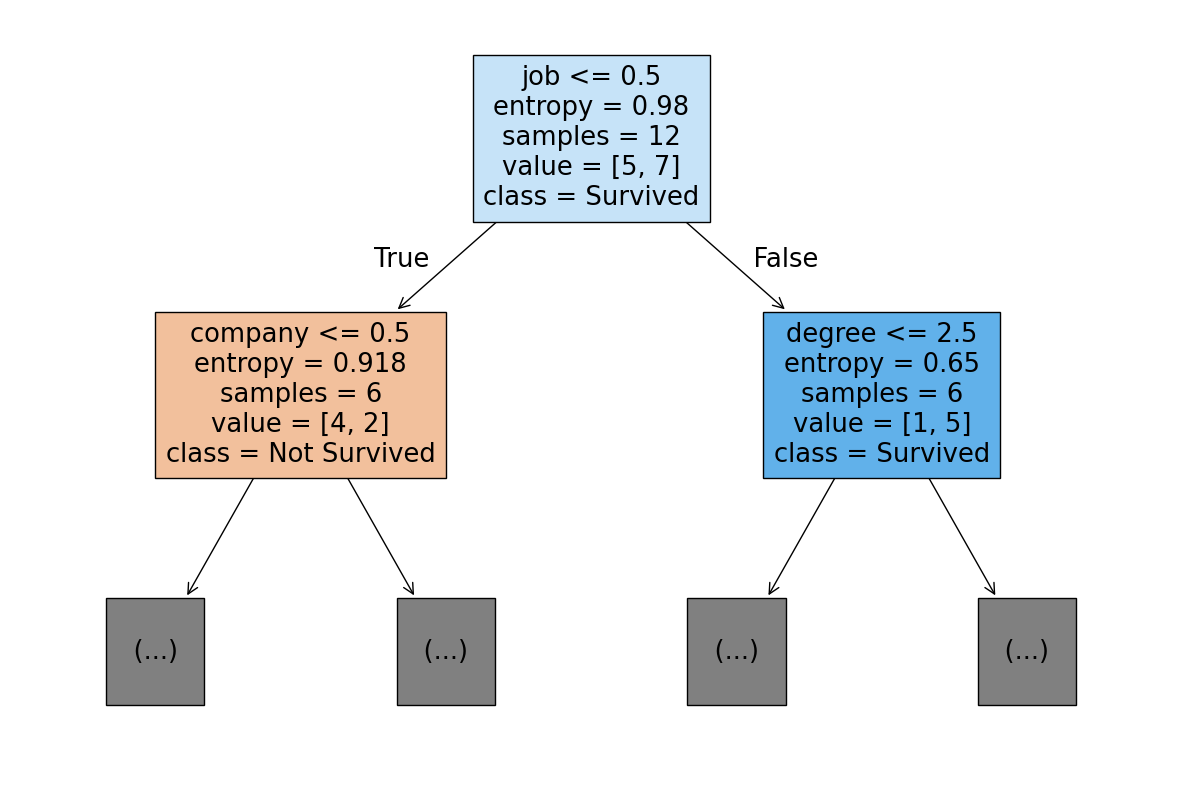

In [99]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(model,filled=True, feature_names=x.columns, class_names=['Not Survived', 'Survived'], max_depth=1)
plt.show()